In [1]:
from typing import Dict, Union, Iterable, Sequence, Tuple, TYPE_CHECKING, List
import os

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
import datetime
import seaborn as sns

from torch import Tensor

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Use relative path in WSL issues
main_outdir = "../imgs/transfer_eval"

In [2]:

def cm_image_creator(
        cm: np.ndarray,
        display_labels_x: Sequence = None,
        display_labels_y: Sequence = None,
        ylabel="True label",
        xlabel="Predicted label",
        include_values=False,
        xticks_rotation=0,
        yticks_rotation=0,
        values_format=None,
        cmap="viridis",
        image_title="",
        format_fn=None,
    vmin=None,vmax=None,
    text_cmap=None
):
    """
    The default Confusion Matrix image creator.
    Code adapted from
    `Scikit learn <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html>`_ # noqa
    :param confusion_matrix_tensor: The tensor describing the confusion matrix.
        This can be easily obtained through Scikit-learn `confusion_matrix`
        utility.
    :param display_labels: Target names used for plotting. By default, `labels`
        will be used if it is defined, otherwise the values will be inferred by
        the matrix tensor.
    :param include_values: Includes values in confusion matrix. Defaults to
        `False`.
    :param xticks_rotation: Rotation of xtick labels. Valid values are
        float point value. Defaults to 0.
    :param yticks_rotation: Rotation of ytick labels. Valid values are
        float point value. Defaults to 0.
    :param values_format: Format specification for values in confusion matrix.
        Defaults to `None`, which means that the format specification is
        'd' or '.2g', whichever is shorter.
    :param cmap: Must be a str or a Colormap recognized by matplotlib.
        Defaults to 'viridis'.
    :param image_title: The title of the image. Defaults to an empty string.
    :return: The Confusion Matrix as a PIL Image.
    """
    if text_cmap is None:
        text_cmap = cmap
        
    fig, ax = plt.subplots()

    n_classes = cm.shape[0]
    im_ = ax.imshow(cm, interpolation="nearest", cmap=cmap, vmin=vmin,vmax=vmax)
    cmap_min, cmap_max = im_.cmap(0), im_.cmap(256)

    if include_values:
        text_ = np.empty_like(cm, dtype=object)

        # print text with appropriate color depending on background
#         if vmin is not None:
#             thresh = (vmin + vmax) / 2.0
#         else:
        thresh = (cm.max() + cm.min()) / 2.0

        for i in range(n_classes):
            for j in range(n_classes):
                text_color = cmap_max if cm[i, j] < thresh else cmap_min

                if format_fn is not None:
                    text_cm = format_fn(cm[i, j])
                else:
                    if values_format is None:
                        text_cm = format(cm[i, j], ".2g")
                        if cm.dtype.kind != "f":
                            text_d = format(cm[i, j], "d")
                            if len(text_d) < len(text_cm):
                                text_cm = text_d
                    else:
                        text_cm = format(cm[i, j], values_format)

                text_[i, j] = ax.text(
                    j, i, text_cm, ha="center", va="center", color=text_color
                )

    if display_labels_x is None:
        display_labels_x = np.arange(n_classes)

    if display_labels_y is None:
        display_labels_y = np.arange(n_classes)
    bar = fig.colorbar(im_, ax=ax)
    # fig.set_clim(-4, 4)

    ax.set(
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=display_labels_x,
        yticklabels=display_labels_y,
        ylabel=ylabel,
        xlabel=xlabel,
    )

    if image_title != "":
        ax.set_title(image_title)

    ax.set_ylim((n_classes - 0.5, -0.5))
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)
    plt.setp(ax.get_yticklabels(), rotation=yticks_rotation)

    fig.tight_layout()
    return fig

In [3]:
# Results for UNbalanced loss adaptation gain
action_matrix_lossAG = [
[2.081413996400598, -2.880795971615108, -1.9594197978144103, -3.199649716646243, -1.8543583713955696,
-2.640163097288702, -2.060456075650804, -3.2732961274959425, -2.822945626385241,
-3.6813338560537554],
[-9.421296714152964, 3.061843715842784, -7.577432342197584, -8.422547290264031, -7.928751238174253,
-8.318088373580537, -7.920421254547203, -15.167433886174802, -8.157267639435917,
-10.277983964329035],
[-0.5976383561653702, -4.535211124758082, 2.108799910027048, -3.2867296451177355, -2.83788559866416,
-0.10243354628096411, -2.843937363694696, -9.770409943439342, -1.767255392993789,
-6.149862957672334],
[-4.105442802186709, -2.6651809262478445, -3.0763892146124356, 0.9927033628790808,
-1.6815314474817995,
-2.7214512399264743, -2.498504734652884, -7.118259722215158, -2.3163531834820668,
-6.308244058783625],
[-3.0996613167721137, -2.663877768779364, -6.087268762830375, -4.90565177721855, 0.6025475993701075,
-5.612693593228534, -6.210860045078923, -6.652103794062579, -4.753654950498098, -8.782459003824583],
[-6.185985238095162, -2.5978895613527673, 0.9446554183096124, -3.555774347598736, -4.117571932928903,
0.5209743261369534, -5.734176843920174, -8.439023250120657, -2.1303031328212785, -6.149305729798868],
[-2.9931404680942326, -5.397105882486959, -2.741095343188963, -3.0595107200818186, -4.071744306133939,
-3.691512955731644, -0.29825229892389915, -3.2611771963260794, -4.012082271690828,
-4.615693110815229],
[-6.894551916411977, -10.409222554972793, -7.680059782663981, -6.2992036715531965, -7.277710449966517,
-8.26941203193747, -5.890942955280051, 2.8075175176613913, -8.59732266793768, -5.475754326498005],
[-1.1646448419035274, -3.887442255583335, -0.6440077325572138, -1.8848401791010148,
-2.238114035555294,
-0.31980896021896627, -2.2220188786878303, -2.0454460859298704, 2.22888431441353,
-2.615165626499014],
[-4.255323515445051, -2.6853705048561096, -3.372339105606079, -2.2747328562614246, -2.113691991606316,
-3.4207833213207524, -2.2679048137848867, -3.1275054005699023, -3.296013070301837,
-0.3868209989610272]]

verb_matrix_lossAG = [
[0.5556482316102599, -0.785497115704957, -0.46440466525761975, -0.999702576184884, -0.6502350910185751,
-0.9130738480782612, -0.794621710145079, -1.7714399929399844, -1.1350068109581268,
-1.7594339141202435],
[-3.672292403330712, 0.4818049740984919, -2.3140520116773207, -2.067571838514115, -1.9888900915964345,
-2.0482233574805937, -2.9546146514848637, -5.187072794056601, -2.663603109839451, -3.3158227196914263],
[-0.3627949135353262, -0.5003585598365529, 0.5572715455207272, -0.003363486436697151,
-0.49007379147526503,
-0.142386857823376, -0.8105158527546069, -3.625618418499275, -0.7774140719907829, -1.598791433052278],
[-1.4264968861975975, -0.08045098898331011, -0.6785737619451855, 0.2692277534267841,
-0.3745945846516784,
-0.22765875280354964, -0.6810692518072969, -3.618340552501656, -0.44012864574969535,
-2.2699575599112456],
[-2.179538010342128, 0.14592530340777607, -2.5546615385490914, -1.5538320692876977, -0.3653148476366262,
-1.2423748428131014, -2.9638183679678205, -2.8796317708988983, -2.096390912547169, -3.468197981918782],
[-2.204315623604256, -0.06160246410707789, -0.2050682685729386, -0.505396375251122, -0.6388111234787707,
0.000698297151497436, -2.1150585560895063, -3.6505362704948143, -1.0504278344741786,
-1.9017332213550384],
[-2.3392308410348224, -3.0557400345706975, -1.662298083499722, -1.853762456698295, -2.3963449402283667,
-2.138893466058804, -1.0892648088154573, -2.270388059262876, -2.508686872826979, -3.587733072858349],
[-2.276894988834971, -2.280048993042135, -1.9193481675092725, -1.3361527510178397, -1.3780892172513843,
-1.3610375262313077, -1.640775166451931, 1.724456245614069, -1.7956609315900918, -1.5004955678784722],
[-0.9115007734615392, -0.5796039727494473, -0.595237862545511, -0.6737126558254927, -0.8852560895603973,
-0.3585968063378231, -0.8893705121077159, -0.38341422610812714, 0.436455765824361, -1.049639193944528],
[-1.9454442212900211, -0.6517259833498263, -1.5332056555843008, -0.926185839265012, -0.8392252644233695,
-1.4183307374007113, -1.045220585700864, -1.7843682662273446, -1.5862944928704794,
-0.5123643874023504]]

noun_matrix_lossAG = [
[1.5257657730290968, -2.0952988325610873, -1.4950151443481443, -2.19994712915176, -1.2041232807489184,
-1.7270892399214046, -1.2658343881587772, -1.5018561391918748, -1.6879387791616371,
-1.9218999783862645],
[-5.749004341591242, 2.580038722033178, -5.263380369932755, -6.3549754625711685, -5.939861123728288,
-6.269865011885052, -4.9658066335627264, -9.980361075092246, -5.493664536346873, -6.962161232468108],
[-0.2348434562163968, -4.034852560345582, 1.551528378975564, -3.283366147677104, -2.347811793545624,
0.03995332663709467, -2.0334215228555395, -6.144791544146008, -0.989841278346188,
-4.5510715468668606],
[-2.6789459240900273, -2.584729928904631, -2.397815444504005, 0.7234755798959388, -1.3069368605683376,
-2.493792487429334, -1.8174354643287027, -3.4999191683751567, -1.8762245001563107,
-4.038286513425935],
[-0.9201232962578932, -2.809803074973775, -3.5326071775369887, -3.3518197053518053, 0.96786244092975,
-4.370318748040762, -3.2470416592105344, -3.772472051558671, -2.6572640317750262,
-5.314261054069224],
[-3.9816696193401455, -2.5362871080402316, 1.1497236843126408, -3.0503779710867467,
-3.4787607921118084, 0.5202760117781626, -3.6191182832288393, -4.788486987793887, -1.079875286251127,
-4.2475725063975425],
[-0.6539096404938243, -2.341365848469922, -1.0787972607474396, -1.2057482382807976,
-1.6753993697174183, -1.5526194749198434, 0.7910125116027183, -0.990789178620886, -1.503395367889519,
-1.0279600736357166],
[-4.617656939594071, -8.129173529664362, -5.7607116111810655, -4.963050947128198, -5.8996212653718985,
-6.908374527445087, -4.250167790471631, 1.0830612479370223, -6.801661713654736, -3.9752588058021705],
[-0.2531440621365632, -3.30783829186845, -0.04876985411713089, -1.2111275383295157,
-1.352857940310201, 0.038787841022788705, -1.3326483946293592, -1.6620318834428434,
1.7924285612731097, -1.565526400443534],
[-2.3098793045336654, -2.0336445253195725, -1.8391334402388424, -1.3485470515031082,
-1.274466748651746, -2.002452600569952, -1.2226842468714012, -1.3431371666025371, -1.709718565122191,
0.12554335161309008]]

In [4]:
# BALANCED loss (macro avg)
action_matrix_balanced_lossAG = [[1.856949551518417,-2.461924330775286,-1.5495145483656163,-1.5991723700208895,-2.346767203394913,-2.674651877467177,-1.771343962733294,-1.9283187552137608,-2.812822119776749,-1.9602096243543856],[-9.180378691737198,1.0631439523057704,-8.174399153773331,-6.88030602175429,-8.385964171473526,-8.647919432703995,-7.000909583155655,-12.661083952967669,-7.845446364466689,-7.60415054995253],[-1.258204238001845,-4.543585555140517,1.4561793641404872,-1.963869826380753,-2.8212649984998937,-1.176339881007218,-2.0052764578504796,-6.632023589198136,-2.020163313929581,-3.075446860377335],[-2.980190054957413,-3.4410855932874913,-2.898045317713761,1.918405278141952,-2.2709319754286064,-3.3487374945326103,-1.8863847418470616,-5.186465041224503,-2.4352224035902257,-3.761758582179093],[-3.5503013296766515,-3.0266320868177647,-6.257389800135636,-3.421159522120499,-1.6914241476698155,-7.758927123133681,-5.972066657130265,-5.322686926905655,-5.520172850672745,-6.350519911829972],[-4.878299490992569,-2.8763320608778233,-0.5991656943006749,-2.7387550039930577,-5.010054366175675,-1.101240889613175,-4.852138297144913,-6.222737090174698,-2.994636313502335,-4.231443183009169],[-3.393115775172257,-3.880359427516005,-2.3216922445936437,-1.3427751227064384,-3.735492484156632,-3.6904733343763567,0.5102503136949306,-2.1545922918958897,-4.244452254359269,-3.5964906378431554],[-7.166489378993058,-9.75777889925673,-7.625011221949601,-4.583226935450577,-7.572620169703505,-8.894537703578019,-5.473465697352433,-0.340024725977921,-8.78312184054091,-5.559269682948136],[-1.242798583094622,-2.992276923243546,-0.6331174536390538,-0.28641392428114365,-1.2272832556410052,-0.914004103724503,-1.2489192648573155,-0.9446485205335852,1.7935817078904872,-0.9296615286512608],[-3.353647009913468,-2.6836488409681554,-2.893798605982804,-1.006376044337296,-2.5090110464735247,-3.8293283148451103,-1.666309134547257,-2.134953276698136,-3.545140044276261,1.4495680169420009]]

verb_matrix_balanced_lossAG = [[0.3610596456244166,-1.1739638052270245,-0.8453757963464099,-1.4993927679345438,-2.006621619252903,-1.584131022481663,-1.1276896200463602,-1.2012932501122782,-1.3724863729760477,-0.7930195532128641],[-4.697806139974339,0.6074240007116964,-3.835492869405491,-4.810201426534399,-4.596963664083225,-4.514399310140354,-3.8118446073815657,-5.111559649495823,-3.860605021505101,-3.2265370092675516],[-0.6533663473412821,-1.2646491728112528,0.7456826963141134,-1.1026447019860577,-1.4887178144738504,-0.41199709990475863,-0.867160578756077,-2.5760519705102274,-1.0798819265649149,-0.1561167440697977],[-1.7541601858422586,-2.439316054372532,-1.4308140478417704,0.17381832978274137,-1.994393130330784,-2.0590379438683817,-1.2446716032311749,-3.146670599965794,-1.5465567312524149,-1.1974251470849344],[-3.032477160482151,-2.044955988912327,-4.6553228102013895,-4.125104685811741,-2.541780253438694,-5.432731410054905,-4.896393557576878,-2.778445979146703,-4.625825663594944,-3.52413155653928],[-2.816022654561741,-1.8883035383508036,-1.0080011091515848,-2.7942340574548075,-3.5463416776940653,-1.7108323774621317,-3.300289889363987,-3.331720610646946,-2.678777953176243,-1.7551720342919657],[-2.423313399343235,-2.443257113485081,-1.5540845594689676,-1.9140136442467997,-3.489775916127903,-2.650369425801975,-0.4152033529565165,-1.802785178212864,-3.302770873098118,-3.121215125112278],[-2.073032637624485,-3.2050383291528055,-2.800512572316868,-2.4092896185204813,-3.017219801931126,-3.314628382711155,-1.6230304441735577,0.45453331849123746,-3.041467448262913,-1.970652838735325],[-0.46552588561032504,-1.1890189848229715,-0.2086856565759012,-0.07393910506222934,-1.082175513295872,-0.905126830129368,-0.4532563886926004,-0.5273931227013895,0.44982741257693126,0.5129740037634543],[-2.2979057035729715,-1.5127728185937237,-1.8122637472436256,-1.597464819936497,-2.348892470388157,-2.986432333974583,-1.7600715360925028,-1.5685446462914774,-2.5694868765160868,0.7162585057928732]]

noun_matrix_balanced_lossAG = [[1.5334368066979396,-1.1889593286322606,-1.4756419343756688,-0.9137379808234228,-1.9778406305121432,-1.8832509202765475,-0.9301554841803564,-0.8053376359747899,-1.526968209247495,-1.1150672120856298],[-5.247194020252134,0.24812391569146983,-5.028443066577817,-3.975007740955257,-7.820997921924497,-6.511007992725278,-4.380843846301938,-8.372546879749205,-5.326743809680846,-5.14228889177313],[-1.5644237680243505,-2.983782498340513,0.6604931669426906,-1.7496578378485692,-2.984215466480161,-1.5494367761420262,-1.9596430940436376,-4.327330319385433,-1.3760921640204442,-2.460797039966489],[-1.424638001422788,-1.9137270135687832,-2.2958438081549657,0.9333598928643214,-1.8341238183783544,-3.0953995866583837,-1.2898566407965673,-2.7653567476080907,-1.7396680993842135,-2.3449742479132665],[-1.882584778766538,-1.6907312555121434,-3.6057822389410967,-1.8555638475226417,-0.4623658342169774,-5.741592137317563,-3.0278174562262548,-3.1191184205817235,-2.7147280854987157,-3.4104344529913915],[-2.2395693940924657,-1.4532606286810887,-0.4963223619269383,-2.1268226785468114,-3.554163662891294,-1.2760307473944676,-2.604360310535337,-3.6966187639044774,-1.8605858964728368,-2.9279801530646337],[-1.349492279987242,-1.0825483484076512,-0.9248525781439794,-0.041329113941098505,-2.1231825036810887,-1.8760192079352391,1.156545908947085,-0.23200914094915517,-1.3245350999640475,-0.9593927545355808],[-4.789734570484067,-7.168616024951841,-5.717961041431333,-3.5356433076666844,-6.212782589893245,-7.324065892200376,-4.17301913927069,-0.7480642480658544,-6.528623311023618,-4.188751904468442],[-0.8779527826117528,-1.8103382272528643,-0.2671415490912459,-0.26664420793523913,-0.8975627107428563,-1.3118679208563817,-0.6785604638861669,-0.1997134370612157,1.2275779562188136,-0.6783744973944676],[-1.1242634935187352,-1.3578450364874852,-1.8250071687506688,-0.07995244691839343,-1.6291448755072606,-2.5641920251654637,-0.495537487964536,-0.30565044115057116,-1.6560899896430028,1.706700118084048]]


In [5]:
action_matrix_balACC_AG = [[4.372390784476111,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,0.17266527440577328,-1.1260360242955254,-1.1260360242955254,1.0245016101130766],[-1.1260360242955254,4.586859635050799,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.099510825356533,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,1.1466912484317475,-1.064610962870464,-1.1260360242955254,-1.0015030230501951,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-0.7351836334431345,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,1.770459372199871,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254],[-1.1260360242955254,-1.1260360242955254,0.3665012891373103,-1.1260360242955254,-1.1260360242955254,-0.3818400408173883,-1.1260360242955254,-1.1260360242955254,-0.11593501419451524,-1.1260360242955254],[-0.14701504527454645,-1.1260360242955254,-0.3797673675791075,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,2.5840096378049315,-1.1260360242955254,-1.1260360242955254,-0.5884016156933749],[-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-0.3684602667197679,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,1.5766666784071768,-1.1260360242955254,-1.1260360242955254],[-0.9447804982124132,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-0.8879407862002874,-1.1260360242955254,-1.1260360242955254,1.886229487969987,-1.1260360242955254],[-0.9597158579753592,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,-1.1260360242955254,0.492892991893765,3.8932689950094943,-1.1260360242955254,8.244163668484811]]

verb_matrix_balACC_AG= [[6.3043877222476254,-5.444827115202502,-1.0353358223745,-0.19602720886834923,-0.3868948513878845,-1.844144521345847,-1.676711173173516,-5.11587974678145,3.71315899590861,4.277395107019721],[-0.9528485055768332,5.553670084476282,-0.18166922046566025,1.2218395514641651,-0.1640784521008971,-1.4857827466018203,-1.0970010282459803,2.395574670511783,-1.2781604485358358,2.4255432551678684],[-0.22285954029375077,0.5923245875838763,3.219356708843595,1.6821235596933786,-0.8797800932589279,-1.4844513083163775,-1.8699478881493616,-5.249514615202502,-1.0659690905111443,3.351469181093794],[-0.8458966339190797,-0.12344216334633629,-0.18166922046566025,1.3676070259987636,-0.8467417995715483,-1.443407653971537,-1.0970010282459803,0.8051728847974982,-1.2781604485358358,2.8885062181308303],[-1.1234622056022987,0.9573088236732898,-0.5202010916499429,0.8899112058371905,0.387200053031564,-1.722832772172996,-1.1211556176179611,1.0004853847974982,-1.663962917671638,2.8885062181308303],[-0.899372569747956,0.4375258259739683,-0.10426983966070669,1.2218395514641651,-0.8540409574792251,-1.2778316762654276,-1.0970010282459803,0.8051728847974982,-1.2009999547086745,3.16628399590861],[1.0589457917324605,0.4375258259739683,-0.18166922046566025,-5.444827115202502,2.052560554598961,-1.4448271152025018,1.7725641891453234,-5.444827115202502,-1.2781604485358358,4.508876588501202],[-0.899372569747956,0.4375258259739683,-5.3956387236629055,-4.531585106070082,-0.899372569747956,-5.41752336093629,-0.6139092408063664,11.664547884797498,-1.2347576707580572,-0.10381537175173428],[-0.3149569853323726,-3.7654735775537382,5.848827582288891,2.2088434151803575,-1.1985831630761972,-1.1417243274580755,-0.22743581085467568,1.0934913371784498,1.095716185451093,-4.750382670758057],[-0.899372569747956,0.4375258259739683,-0.18166922046566025,1.2218395514641651,-0.3943220646974517,-1.4448271152025018,-1.0970010282459803,5.5440709111132875,-1.2781604485358358,5.686609199160644]]

noun_matrix_balACC_AG=[[11.976009666627425,-3.2033152278873467,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-1.514696517992041,-4.5922041167762355,-4.5922041167762355,-0.9484794204199604],[-4.5922041167762355,3.7411292165570966,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355],[-3.806925166940323,-4.5922041167762355,-0.8885004130725322,-4.5922041167762355,-2.8680661857417524,-2.829067827777878,-3.993799861457086,-4.5922041167762355,-4.298086469717412,-4.5922041167762355],[-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,1.4323269077547884,-4.466047682798103,-4.5922041167762355,-4.4619957834429025,-4.057444758487465,-1.6510276461880005,-4.5922041167762355],[-3.7905163530631554,-4.5922041167762355,0.5518288050344635,-0.046749571321689665,1.9918631569462093,-3.6890842481391255,-4.5922041167762355,-4.5922041167762355,-0.18043941089388227,-4.5922041167762355],[-4.5922041167762355,-4.5922041167762355,-0.8885004130725322,-4.5922041167762355,-1.1439282547072702,-2.8680661857417524,-4.5922041167762355,-4.5922041167762355,-1.6510276461880005,-4.5922041167762355],[-0.36373802122153265,-1.8144263389984576,-1.7981820245085296,-0.8259703505424696,-4.49078423848009,-2.7677527061179283,12.840752443507451,1.7064971819250625,-1.7681300427021611,10.066558173565],[-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,-4.267528792100911,-4.5922041167762355,-4.5922041167762355,-4.5922041167762355,2.894426899266545,-4.5922041167762355,-4.5922041167762355],[-2.8139214524176217,-4.129241153813273,-2.545420491045242,-1.7891738137459323,-1.8681596349521068,-2.723567006759815,-0.5484420278013813,1.920400925240572,7.416742658606525,3.5656906200658707],[-2.975829399135695,-4.5922041167762355,-4.5922041167762355,-4.289173813745933,-4.5922041167762355,-4.5922041167762355,1.2541104728894172,7.172501765576705,-4.483271654902597,9.021156207110405]]


In [6]:
# Make your pick
action_matrix = action_matrix_balanced_lossAG
verb_matrix = verb_matrix_balanced_lossAG
noun_matrix = noun_matrix_balanced_lossAG

In [7]:
action_matrix = np.array(action_matrix, dtype=float)
verb_matrix = np.array(verb_matrix, dtype=float)
noun_matrix = np.array(noun_matrix, dtype=float)

[1.918405278141952, 0.7456826963141134, 1.706700118084048]
[0.7456826963141134, 0.7456826963141134, 0.7456826963141134]


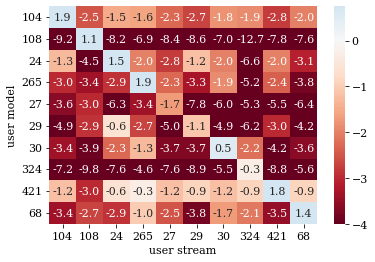

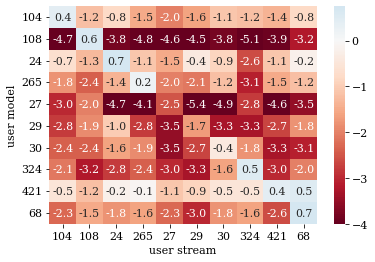

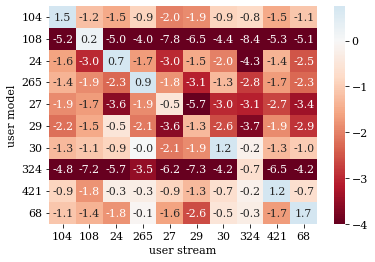

In [15]:
cmap = sns.color_palette('RdBu', as_cmap=True) # "gist_heat"
modes = ['action', 'verb', 'noun']

# Paths
title = "avg_AG_transfer_eval"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)
filename = f"{{}}_{title}.pdf"

os.makedirs(parent_dirpath, exist_ok=True)

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 11

maxes = [a.max() for a in [action_matrix, verb_matrix, noun_matrix]]
print(maxes)
vmaxes = [min(maxes)]*3 # All same scale
# vmaxes = maxes # Each own scale
print(vmaxes)

mins = [a.min() for a in [action_matrix, verb_matrix, noun_matrix]]
vmins = [-4]*3
# vmins = mins # Each own scale

for mode_idx, mode in enumerate(modes):
    if mode == "action":
        # TRANSFER_MATRIX/avg_AG/pred_action_batch/loss
        # matrix = [[-4.319421209013213,null,null,null,null,null,null,null,null,null],[null,-21.00615071993479,null,null,null,null,null,null,null,null],[null,null,1.7079791380011518,null,null,null,null,null,null,null],[null,null,null,-9.572440371261193,null,null,null,null,null,null],[null,null,null,null,-5.487690441165265,null,null,null,null,null],[null,null,null,null,null,-0.09211561922387128,null,null,null,null],[null,null,null,null,null,null,0.06582317764268202,null,null,null],[null,null,null,null,null,null,null,2.0436283127577215,null,null],[null,null,null,null,null,null,null,null,-15.469999925127638,null],[null,null,null,null,null,null,null,null,null,-2.742694706144467]]
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        matrix = action_matrix

    elif mode == "verb":
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        matrix = verb_matrix

    elif mode == "noun":
        matrix = noun_matrix
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]

    else:
        raise ValueError()

    input_matrix = np.array(matrix, dtype=float)  # Square matrix
    assert len(input_matrix) == len(input_matrix[0]), "Must be square"

#     fig = cm_image_creator(
#         cm=input_matrix,
#         display_labels_x=x_labels,
#         xlabel="User Stream",
#         display_labels_y=y_labels,
#         ylabel="User Model",
#         cmap=cmap,
#         # cmap="Blues",
#         include_values=True,
#         format_fn=lambda x: round(x, 1),
#         vmin=-3,vmax=3
#     )

    # Round
    input_matrix = input_matrix.round(decimals=1)
    
    # Heatmap
    vmax = vmaxes[mode_idx]
    vmin = vmins[mode_idx]
    ax = sns.heatmap(input_matrix, center=0,cmap='RdBu', annot=True, fmt='.1f', vmin=vmin, vmax=vmax,
                    xticklabels=x_labels, yticklabels=y_labels)
    plt.yticks(rotation=0) 
    plt.xlabel("user stream")
    plt.ylabel("user model")

    fig = ax.get_figure()

    path = os.path.join(parent_dirpath, filename.format(mode))
    fig.savefig(path, )
    plt.show()